In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import utils
import sklearn
from sklearn.preprocessing import LabelEncoder
import pickle as pkl
import shutil
import joblib

## Modelos ##
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

## Métricas ##
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, multilabel_confusion_matrix, cohen_kappa_score
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.multiclass import OneVsRestClassifier

In [2]:
ruta = "C:\\Users\\Usuario\\Desktop\\The Bridge\\Data Analytics y ML\Mio\ML - Trabajo final\\src\\data\\raw\\students_adaptability_level_online_education.csv"
data = pd.read_csv(ruta)
data_df = pd.DataFrame(data)

## Feature engineering

In [3]:
# Comenzamos a transformar las variables a numéricas para poder incluirlas en el modelo, a través del método de pandas 
# pd.get_dummies

data_df["Gender"] = data_df["Gender"].apply(lambda x: 1 if x == "Boy" else 0)

In [4]:
age_dummies = pd.get_dummies(data=data_df["Age"])
data_df = pd.concat([data_df, age_dummies], axis=1)
data_df.drop(["Age"], axis=1, inplace=True)

In [5]:
education_level_dummies = pd.get_dummies(data=data_df["Education Level"])
data_df = pd.concat([data_df, education_level_dummies], axis=1)
data_df.drop(["Education Level"], axis=1, inplace=True)

In [6]:
data_df["Institution Type"] = data_df["Institution Type"].apply(lambda x: 1 if x == "Non Government" else 0)

In [7]:
data_df["IT Student"] = data_df["IT Student"].apply(lambda x: 1 if x == "Yes" else 0)

In [8]:
data_df["Location"] = data_df["Location"].apply(lambda x: 1 if x == "Yes" else 0)

In [9]:
data_df["Load-shedding"] = data_df["Load-shedding"].apply(lambda x: 1 if x == "High" else 0)

In [10]:
financial_dummies = pd.get_dummies(data=data_df["Financial Condition"])
data_df = pd.concat([data_df, financial_dummies], axis=1)
data_df.drop(["Financial Condition"], axis=1, inplace=True)

In [11]:
data_df["Internet Type"] = data_df["Internet Type"].apply(lambda x: 1 if x == "Wifi" else 0)

In [12]:
network_dummies = pd.get_dummies(data=data_df["Network Type"])
data_df = pd.concat([data_df, network_dummies], axis=1)
data_df.drop(["Network Type"], axis=1, inplace=True)

In [13]:
duration_dummies = pd.get_dummies(data=data_df["Class Duration"])
data_df = pd.concat([data_df, duration_dummies], axis=1)
data_df.drop(["Class Duration"], axis=1, inplace=True)

In [14]:
data_df["Self Lms"] = data_df["Self Lms"].apply(lambda x: 1 if x == "Yes" else 0)

In [15]:
device_dummies = pd.get_dummies(data=data_df["Device"])
data_df = pd.concat([data_df, device_dummies], axis=1)
data_df.drop(["Device"], axis=1, inplace=True)

In [16]:
# Por último, reemplazo la variable target por elementos numéricos

data_df["Adaptivity Level"] = data_df["Adaptivity Level"].replace(["Low", "Moderate", "High"], [1,2,3])

In [17]:
data_df["Adaptivity Level"].unique()

array([2, 1, 3], dtype=int64)

In [18]:
data_df.dtypes.unique()

array([dtype('int64'), dtype('uint8')], dtype=object)

In [19]:
data_df.to_csv("C://Users//Usuario//Desktop//The Bridge//ML - Trabajo final//src//data//processed//data_df_num.csv", header = True, index = False)

## Aplicación de los modelos 

In [20]:
from utils import regression_multiclass

regression_multiclass(data_df)

DecisionTreeClassifier()
[[[199  19]
  [ 12 132]]

 [[150  16]
  [ 19 177]]

 [[337   3]
  [  7  15]]]
The Cohen Kappa Score is 0.8064606899656706
---------------------
KNeighborsClassifier()
[[[186  32]
  [ 34 110]]

 [[127  39]
  [ 34 162]]

 [[333   7]
  [ 10  12]]]
The Cohen Kappa Score is 0.601085021615665
---------------------
GaussianNB()
[[[183  35]
  [ 74  70]]

 [[160   6]
  [175  21]]

 [[131 209]
  [  1  21]]]
The Cohen Kappa Score is 0.1427651271170387
---------------------
MultinomialNB()
[[[179  39]
  [ 72  72]]

 [[ 87  79]
  [ 46 150]]

 [[327  13]
  [ 13   9]]]
The Cohen Kappa Score is 0.31954887218045114
---------------------
BernoulliNB()
[[[177  41]
  [ 67  77]]

 [[ 99  67]
  [ 55 141]]

 [[316  24]
  [ 10  12]]]
The Cohen Kappa Score is 0.3408376096672736
---------------------
RandomForestClassifier()
[[[200  18]
  [ 13 131]]

 [[149  17]
  [ 18 178]]

 [[337   3]
  [  7  15]]]
The Cohen Kappa Score is 0.8061770839204193
---------------------
LogisticRegression()

c:\Users\Usuario\miniconda3\envs\rampup_py39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()
[[  0   0   0   0]
 [131  13   0   0]
 [ 15 178   3   0]
 [  3   5  14   0]]
---------------------


In [21]:
# Los modelos SVM y Logistic Regression pueden verse como los que presentan peores resultados. Esto se explica porque 
# dichos modelos fueron diseñados para clasificaciones binarias, por lo que no funcionan de forma correcta para 
# clasificaciones multiclase

In [22]:
X = data_df.drop(columns="Adaptivity Level")
y = data_df["Adaptivity Level"]

In [23]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1234)

In [24]:
# Con los hiperparámetros dados por defecto, los modelos que predicen mejor son el Decission Tree y el Random Forrest, 
# de acuerdo a la confusion matrix y el Cohen Kappa Score. 
# Basado en esto, se utlizará GridSearch para la optimización de los hiperparámetros para dichos modelo, con el fin de 
# mejorar las métricas

### Optimización hiperparámetros Random Forrest

In [25]:
# Random Forrest

forrest = RandomForestClassifier()
forrest.fit(x_train,y_train)

RandomForestClassifier()

In [26]:
y_pred_forrest = forrest.predict(x_test)

In [27]:
print(forrest.__doc__)


    A random forest classifier.

    A random forest is a meta estimator that fits a number of decision tree
    classifiers on various sub-samples of the dataset and uses averaging to
    improve the predictive accuracy and control over-fitting.
    The sub-sample size is controlled with the `max_samples` parameter if
    `bootstrap=True` (default), otherwise the whole dataset is used to build
    each tree.

    Read more in the :ref:`User Guide <forest>`.

    Parameters
    ----------
    n_estimators : int, default=100
        The number of trees in the forest.

        .. versionchanged:: 0.22
           The default value of ``n_estimators`` changed from 10 to 100
           in 0.22.

    criterion : {"gini", "entropy", "log_loss"}, default="gini"
        The function to measure the quality of a split. Supported criteria are
        "gini" for the Gini impurity and "log_loss" and "entropy" both for the
        Shannon information gain, see :ref:`tree_mathematical_formulation`.
 

In [28]:
forrest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [29]:
dicc_hiperparametros_forrest = {
                        "n_estimators":[50, 100, 150, 200],
                        "criterion":["gini", "entropy", "log_loss"],
                        "max_depth":[5, 10, 15, None],
                        "max_features":["sqrt", "log2", None],   
                        }

In [30]:
Ajuste_forrest = GridSearchCV(estimator = forrest,
            param_grid = dicc_hiperparametros_forrest)

In [31]:
Ajuste_forrest.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15, None],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100, 150, 200]})

In [32]:
Ajuste_forrest.best_estimator_

RandomForestClassifier(criterion='log_loss', n_estimators=50)

In [33]:
y_pred_ajust_forrest=Ajuste_forrest.predict(x_test)

In [90]:
print(forrest)
print(multilabel_confusion_matrix(y_test, y_pred_forrest))
print(f"The Cohen Kappa Score is {cohen_kappa_score(y_test, y_pred_forrest)}")

RandomForestClassifier()
[[[200  18]
  [ 14 130]]

 [[148  18]
  [ 18 178]]

 [[337   3]
  [  7  15]]]
The Cohen Kappa Score is 0.8009306260575296


In [91]:
print(forrest)
print(multilabel_confusion_matrix(y_test, y_pred_ajust_forrest))
print(f"The Cohen Kappa Score is {cohen_kappa_score(y_test, y_pred_ajust_forrest)}")

RandomForestClassifier()
[[[200  18]
  [ 13 131]]

 [[149  17]
  [ 18 178]]

 [[337   3]
  [  7  15]]]
The Cohen Kappa Score is 0.8061770839204193


### Optimización hiperparámetros Decision Tree

In [36]:
# Decision Tree

tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
y_pred_tree = tree.predict(x_test)

In [38]:
print(tree.__doc__)

A decision tree classifier.

    Read more in the :ref:`User Guide <tree>`.

    Parameters
    ----------
    criterion : {"gini", "entropy", "log_loss"}, default="gini"
        The function to measure the quality of a split. Supported criteria are
        "gini" for the Gini impurity and "log_loss" and "entropy" both for the
        Shannon information gain, see :ref:`tree_mathematical_formulation`.

    splitter : {"best", "random"}, default="best"
        The strategy used to choose the split at each node. Supported
        strategies are "best" to choose the best split and "random" to choose
        the best random split.

    max_depth : int, default=None
        The maximum depth of the tree. If None, then nodes are expanded until
        all leaves are pure or until all leaves contain less than
        min_samples_split samples.

    min_samples_split : int or float, default=2
        The minimum number of samples required to split an internal node:

        - If int, then cons

In [39]:
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [40]:
dicc_hiperparametros_tree = {"max_depth":[4, 6, 8, 10, None],
                        "splitter":["best", "random"],
                        "criterion":["gini", "entropy", "log_loss"],
                        "min_samples_split":[0.5, 1, 2, 4],
                        "min_samples_leaf":[1, 2, 4],
                        "max_features":["auto", "sqrt", "log2", None] 
                        }


In [41]:
Ajuste_tree = GridSearchCV(estimator = tree,
            param_grid = dicc_hiperparametros_tree)

In [42]:
Ajuste_tree.fit(x_train,y_train)

c:\Users\Usuario\miniconda3\envs\rampup_py39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Usuario\miniconda3\envs\rampup_py39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Usuario\miniconda3\envs\rampup_py39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Usuario\miniconda3\envs\rampup_py39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 6, 8, 10, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [0.5, 1, 2, 4],
                         'splitter': ['best', 'random']})

In [43]:
Ajuste_tree.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_features='log2',
                       splitter='random')

In [44]:
y_pred_ajust_tree = Ajuste_tree.predict(x_test)

In [45]:
print(tree)
print(multilabel_confusion_matrix(y_test, y_pred_tree))
print(f"The Cohen Kappa Score is {cohen_kappa_score(y_test, y_pred_tree)}")

DecisionTreeClassifier()
[[[199  19]
  [ 12 132]]

 [[149  17]
  [ 19 177]]

 [[337   3]
  [  8  14]]]
The Cohen Kappa Score is 0.8008800880088008


In [92]:
print(tree)
print(multilabel_confusion_matrix(y_test, y_pred_ajust_tree))
print(f"The Cohen Kappa Score is {cohen_kappa_score(y_test, y_pred_ajust_tree)}")

DecisionTreeClassifier()
[[[199  19]
  [  9 135]]

 [[152  14]
  [ 19 177]]

 [[337   3]
  [  8  14]]]
The Cohen Kappa Score is 0.816600523516001


In [47]:
# Los resultados indican que el modelo que predice mejor es el Decission Tree luego de la optimización de los 
# hiperparámetros con el GridSearch.
# Igualmente, lo que nos interesa más es la clasificación de la clase 3, referente a los estudiantes que tienen un nivel 
# de adaptación "High". Esto es así porque si se clasifica un estudiante con un alto nivel de adaptación, se le darán menos
# facilidades para su adaptación, lo cual puede significar una formación muy pobre o incluso el abandono a estudiar de 
# esa persona

In [48]:
# Vemos la importancia relativa de cada columna sobre la variable target

dict(zip(x_train, tree.feature_importances_))

{'Gender': 0.08616364905609455,
 'Institution Type': 0.048155496928621755,
 'IT Student': 0.029917523228160214,
 'Location': 0.07502570708637973,
 'Load-shedding': 0.038094162986662634,
 'Internet Type': 0.059218901847995456,
 'Self Lms': 0.07080070142458092,
 '1-5': 0.03212092133543043,
 '11-15': 0.005800199125960835,
 '16-20': 0.04306059044598957,
 '21-25': 0.01663432639922536,
 '26-30': 0.01504559152146021,
 '6-10': 0.019826669244972336,
 'College': 0.024999036897310044,
 'School': 0.025439385232328235,
 'University': 0.010443868752682548,
 'Mid': 0.03863149468398366,
 'Poor': 0.0054844762799488396,
 'Rich': 0.055649628572797046,
 '2G': 0.00931379092042462,
 '3G': 0.027712847249313,
 '4G': 0.01930612038880917,
 '0': 0.1447131558755272,
 '1-3': 0.01737794345983167,
 '3-6': 0.0224050499917079,
 'Computer': 0.016490114299913067,
 'Mobile': 0.04216864676388919,
 'Tab': 0.0}

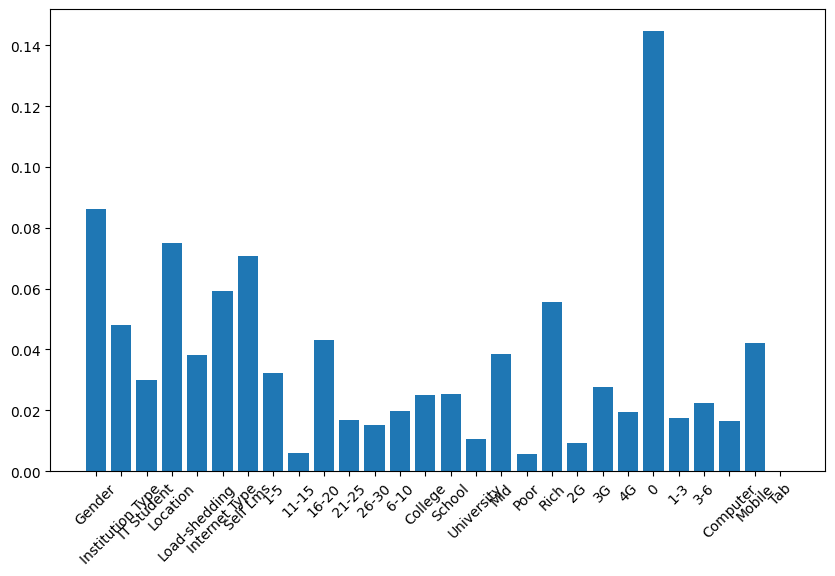

In [49]:
# Se grafica la importancia de las variables para verlo con mayor claridad

plt.figure(figsize=(10,6))
plt.bar(x_train.columns, tree.feature_importances_)
plt.xticks(rotation=45)
plt.show()

In [50]:
# La columnas que tienen valor 0 son "Tab", que refiere al dispositivo utilizado, y "11-15", que refiere a una franja etárea. 
# Por lo que se eliminarán dichas columnas para ver el resultado en el scoring de la métrica.

In [51]:
# Tab

x_train_tab = x_train.drop(columns="Tab")
x_test_tab = x_test.drop(columns="Tab")

In [52]:
tree.fit(x_train_tab, y_train)

DecisionTreeClassifier()

In [53]:
y_pred_tab = tree.predict(x_test_tab)

In [54]:
print(tree)
print(multilabel_confusion_matrix(y_test, y_pred_tab))
print(f"The Cohen Kappa Score {cohen_kappa_score(y_test, y_pred_tab)}")

DecisionTreeClassifier()
[[[199  19]
  [ 10 134]]

 [[152  14]
  [ 19 177]]

 [[337   3]
  [  7  15]]]
The Cohen Kappa Score 0.8169148637257657


In [55]:
# Luego de eliminar la columna "Tab", el scoring nos devuelve que la predicción gana precisión, por lo que se 
# elimina dicha columna definitivamente

In [56]:
x_train = x_train_tab
x_test = x_test_tab

### OneVsRest

In [57]:
modelo_multiclase = OneVsRestClassifier(Ajuste_tree)
modelo_multiclase.fit(x_train, y_train)

OneVsRestClassifier(estimator=DecisionTreeClassifier())

In [93]:
print("Classification Report")
print(classification_report(y_test, modelo_multiclase.predict(x_test)))

Classification Report
              precision    recall  f1-score   support

           1       0.88      0.90      0.89       144
           2       0.92      0.91      0.92       196
           3       0.75      0.68      0.71        22

    accuracy                           0.90       362
   macro avg       0.85      0.83      0.84       362
weighted avg       0.89      0.90      0.89       362



In [59]:
precision_score(y_test, modelo_multiclase.predict(x_test), average=None)

array([0.88435374, 0.91794872, 0.75      ])

In [60]:
for i in modelo_multiclase.predict_proba(x_test):
    print(i)

[0. 0. 1.]
[0. 0. 1.]
[0. 1. 0.]
[0. 0. 1.]
[0. 1. 0.]
[1. 0. 0.]
[0. 1. 0.]
[0.2173913 0.7826087 0.       ]
[0.06060606 0.66666667 0.27272727]
[0. 1. 0.]
[0. 1. 0.]
[1. 0. 0.]
[0. 1. 0.]
[0. 1. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0. 1. 0.]
[1. 0. 0.]
[0. 1. 0.]
[0. 1. 0.]
[1. 0. 0.]
[0.         0.71428571 0.28571429]
[0.06060606 0.66666667 0.27272727]
[1. 0. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 0. 1.]
[1. 0. 0.]
[0. 1. 0.]
[1. 0. 0.]
[0. 1. 0.]
[0. 1. 0.]
[1. 0. 0.]
[0.06060606 0.66666667 0.27272727]
[1. 0. 0.]
[0. 1. 0.]
[1. 0. 0.]
[0.66666667 0.33333333 0.        ]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0.8125 0.1875 0.    ]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0.66666667 0.33333333 0.        ]
[0.         0.16666667 0.83333333]
[0.81818182 0.18181818 0.        ]
[1. 0. 0.]
[0. 1. 0.]
[0. 1. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0. 1. 0.]
[0.625 0.    0.375]
[0.81818182 0.18181818 0.        ]
[1. 0. 0.]
[1. 0. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[1. 0. 0.]
[0.81818182 0.18181818 0.        ]
[0.

c:\Users\Usuario\miniconda3\envs\rampup_py39\lib\site-packages\sklearn\multiclass.py:492: RuntimeWarning: invalid value encountered in divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]


In [61]:
# Luego de aplicar el predict_proba, se analiza qué clase de la target es la que presenta probabilidades menos 
# determinantes en general, llegando a la conclusión que la clase que se predice de forma menos segura es la clase 1.
# Por otro lado, de acuerdo al classification_report la clase con mejores métricas es la 2, por lo que se agruparán 
# las clases 1 y 3 y se volverá a entrenar el modelo. Una vez identificados todos los registros de la clase 2, se 
# eliminarán del dataset y se volverá a entrenar y predecir con las clases 1 y 3 únicamente. 

In [94]:
data_df.iloc[38]["Adaptivity Level"]

1

In [95]:
data_df.iloc[34]["Adaptivity Level"]

1

In [96]:
data_df.iloc[151]["Adaptivity Level"]

1

In [103]:
data_df.iloc[22]["Adaptivity Level"]

1

In [65]:
data_df_OVR = data_df.copy()

In [66]:
data_df_OVR["Adaptivity Level"] = data_df["Adaptivity Level"].replace(3,1)

In [67]:
data_df_OVR["Adaptivity Level"].unique()

array([2, 1], dtype=int64)

In [68]:
# Al transformarse en un modelo de clasificación binario, se puede utilizar el resto de las métricas de clasificación. 
# Igualmente, los modelos que siguen otorgando mejores métricas son el Decision Tree y el Random Forrest

from utils import regression

regression(data_df_OVR)

c:\Users\Usuario\miniconda3\envs\rampup_py39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Usuario\miniconda3\envs\rampup_py39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Accuracy Score,Recall Score,Precision Score,f1_Score
DecisionTree,0.903315,0.903614,0.887574,0.895522
RandomForest,0.900552,0.891566,0.891566,0.891566
SuperVectorMachine,0.801105,0.801205,0.773256,0.786982
KNeighbors,0.795580,0.76506,0.783951,0.77439
LogisticRegression,0.723757,0.686747,0.703704,0.695122
GaussianNB,0.668508,0.518072,0.68254,0.589041
BernoulliNB,0.638122,0.5,0.633588,0.558923
MultinomialNB,0.624309,0.518072,0.605634,0.558442
XGBoost,0.052486,"[0.0, 0.1144578313253012, 0.0]","[0.0, 0.09644670050761421, 0.0]","[0.0, 0.10468319559228649, 0.0]"


In [69]:
X_ovr = data_df_OVR.drop(columns="Adaptivity Level")
y_ovr = data_df_OVR["Adaptivity Level"]

In [70]:
x_train_ovr,x_test_ovr,y_train_ovr,y_test_ovr=train_test_split(X_ovr,y_ovr,test_size=0.3,random_state=1234)

In [71]:
Ajuste_tree.fit(x_train_ovr, y_train_ovr)

DecisionTreeClassifier()

In [72]:
y_pred_OVR = Ajuste_tree.predict(x_test_ovr)

In [106]:
print(f"The accuracy score is {accuracy_score(y_test_ovr, y_pred_OVR)}")
print(f"The precision score is {precision_score(y_test_ovr, y_pred_OVR)}")
print(f"The f1_score is {f1_score(y_test_ovr, y_pred_OVR)}")

The accuracy score is 0.9116022099447514
The precision score is 0.8941176470588236
The f1_score is 0.9047619047619048


In [74]:
len(y_pred_OVR)

362

In [75]:
y_pred_OVR

array([1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2,
       2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1,

In [76]:
# Elimino del df original todas las clases 2

In [77]:
data_df_OVR_2 = data_df.drop(data_df[(data_df["Adaptivity Level"] == 2)].index)

In [78]:
data_df_OVR_2.reset_index(inplace=True)

In [79]:
data_df_OVR_2["Adaptivity Level"].unique()

array([1, 3], dtype=int64)

In [80]:
from utils import regression

regression(data_df_OVR_2)

c:\Users\Usuario\miniconda3\envs\rampup_py39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Usuario\miniconda3\envs\rampup_py39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Usuario\miniconda3\envs\rampup_py39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined

,Accuracy Score,Recall Score,Precision Score,f1_Score
RandomForest,0.982759,0.993243,0.986577,0.989899
DecisionTree,0.942529,0.945946,0.985915,0.965517
LogisticRegression,0.919540,0.972973,0.935065,0.953642
MultinomialNB,0.856322,0.905405,0.924138,0.914676
SuperVectorMachine,0.850575,1.0,0.850575,0.919255
KNeighbors,0.833333,0.966216,0.856287,0.907937
BernoulliNB,0.833333,0.871622,0.928058,0.898955
GaussianNB,0.678161,0.628378,0.989362,0.768595
XGBoost,0.022989,"[0.0, 0.02702702702702703, 0.0]","[0.0, 0.18181818181818182, 0.0]","[0.0, 0.04705882352941177, 0.0]"


In [81]:
X_ovr_2 = data_df_OVR_2.drop(columns="Adaptivity Level")
y_ovr_2 = data_df_OVR_2["Adaptivity Level"]

In [82]:
x_train_ovr_2,x_test_ovr_2,y_train_ovr_2,y_test_ovr_2=train_test_split(X_ovr_2,y_ovr_2,test_size=0.3,random_state=1234)

In [83]:
x_train_ovr_2.drop(columns="index", inplace=True)

In [84]:
# El mejor en este caso es el Random Forest, por lo que se procederá a entrenarlo

forrest.fit(x_train_ovr_2, y_train_ovr_2)

RandomForestClassifier()

In [85]:
x_test_ovr_2.drop(columns="index", inplace=True)

In [86]:
y_pred_OVR_2 = forrest.predict(x_test_ovr_2)

In [105]:
print(f"The accuracy score is {accuracy_score(y_test_ovr_2, y_pred_OVR_2)}")
print(f"The precision score is {precision_score(y_test_ovr_2, y_pred_OVR_2)}")
print(f"The f1_score is {f1_score(y_test_ovr_2, y_pred_OVR_2)}")

The accuracy score is 0.9827586206896551
The precision score is 0.9801324503311258
The f1_score is 0.9899665551839464


## Guardado del modelo entrenado

In [88]:
with open("C://Users//Usuario//Desktop//The Bridge//ML - Trabajo final//src//model/my_model_multiclass.pkl","wb") as f:
    joblib.dump(tree, f)

In [89]:
with open("C://Users//Usuario//Desktop//The Bridge//ML - Trabajo final//src//model/my_model_binary.pkl","wb") as f:
    joblib.dump(forrest, f)